# Imports

In [58]:
import pandas as pd
import numpy as np

import datetime as dt
import reverse_geocoder as rg
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch



import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

from my_functions import *  #feature_engineering_info, feature_engineering_basket, all_purchased_items
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
basket_df = pd.read_csv('customer_basket.csv')
info_df = pd.read_csv('customer_info.csv')

# Exploratory Data Analysis

In [60]:
basket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   invoice_id     100000 non-null  int64 
 1   list_of_goods  100000 non-null  object
 2   customer_id    100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [61]:
basket_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
invoice_id,100000.0,NaN,NaN,NaN,6124713.66375,3533207.950417,20054.0,3066431.5,6118618.0,9195346.75,12242220.0
list_of_goods,100000,98742,['oil'],33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,100000.0,NaN,NaN,NaN,16945.56902,9837.987201,1.0,8425.0,16917.0,25536.0,34060.0


In [62]:
basket_df.head()

,invoice_id,list_of_goods,customer_id
0,5062209,"['megaman zero 3', 'energy bar', 'pokemon viol...",4925
1,4272512,"['black beer', 'bramble', 'laptop', 'pokemon v...",19046
2,7121052,"['soup', 'shallot', 'cake', 'fresh bread', 'cr...",10318
3,5847748,"['soup', 'cooking oil', 'cereals', 'oil', 'dog...",27283
4,6336114,"['eggplant', 'mint green tea', 'oil', 'bacon',...",16072


In [63]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34060 entries, 0 to 34059
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               34060 non-null  int64  
 1   customer_id                              34060 non-null  int64  
 2   customer_name                            34060 non-null  object 
 3   customer_gender                          34060 non-null  object 
 4   customer_birthdate                       33719 non-null  object 
 5   kids_home                                33311 non-null  float64
 6   teens_home                               33277 non-null  float64
 7   number_complaints                        33038 non-null  float64
 8   distinct_stores_visited                  33379 non-null  float64
 9   lifetime_spend_groceries                 34060 non-null  float64
 10  lifetime_spend_electronics               34060

In [64]:
info_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,34060.0,NaN,NaN,NaN,17029.5,9832.419421,0.0,8514.75,17029.5,25544.25,34059.0
customer_id,34060.0,NaN,NaN,NaN,20010.854433,11557.889072,1.0,10018.75,19985.5,30042.25,40000.0
customer_name,34060,33579,Robert Brown,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_gender,34060,2,male,17133,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_birthdate,33719,33710,12/23/1956 11:57 PM,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kids_home,33311.0,NaN,NaN,NaN,1.170244,1.307319,0.0,0.0,1.0,1.0,10.0
teens_home,33277.0,NaN,NaN,NaN,0.936292,0.759579,0.0,0.0,1.0,1.0,4.0
number_complaints,33038.0,NaN,NaN,NaN,0.832042,0.771205,0.0,0.0,1.0,1.0,4.0
distinct_stores_visited,33379.0,NaN,NaN,NaN,2.914078,1.549081,1.0,2.0,3.0,4.0,10.0
lifetime_spend_groceries,34060.0,NaN,NaN,NaN,22818.404698,20098.763199,0.0,9346.0,15877.5,30428.25,158544.0


In [65]:
# Percentage of missing values in each column
for col in info_df.columns:
    pct_missing = np.mean(info_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 0 - 0%
customer_id - 0%
customer_name - 0%
customer_gender - 0%
customer_birthdate - 1%
kids_home - 2%
teens_home - 2%
number_complaints - 3%
distinct_stores_visited - 2%
lifetime_spend_groceries - 0%
lifetime_spend_electronics - 0%
typical_hour - 4%
lifetime_spend_vegetables - 3%
lifetime_spend_nonalcohol_drinks - 0%
lifetime_spend_alcohol_drinks - 2%
lifetime_spend_meat - 0%
lifetime_spend_fish - 5%
lifetime_spend_hygiene - 0%
lifetime_spend_videogames - 0%
lifetime_spend_petfood - 0%
lifetime_total_distinct_products - 0%
percentage_of_products_bought_promotion - 0%
year_first_transaction - 0%
loyalty_card_number - 32%
latitude - 0%
longitude - 0%


In [66]:
# Percentage of missing values in each column
for col in basket_df.columns:
    pct_missing = np.mean(basket_df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

invoice_id - 0%
list_of_goods - 0%
customer_id - 0%


# Preprocessing

In [67]:
# Get all new features for info_df
feature_engineering_info(info_df)

In [68]:
# Get all new features for basket_df
feature_engineering_basket(basket_df)

In [69]:
# Get a full list of all items purchased for each customer (with repetitions)
all_items = all_purchased_items(basket_df)

In [70]:
all_items.head()

,customer_id,all_purchased_items
0,1,"[pickles, protein bar, mashed potato, beer, tu..."
1,2,"[shampoo, tooth brush, portal, vegetables mix,..."
2,4,"[shallot, mashed potato, olive oil, asparagus,..."
3,5,"[candy bars, zucchini, mint green tea, strong ..."
4,6,"[candy bars, gadget for tiktok streaming, port..."


# Visualization

## General data visualization

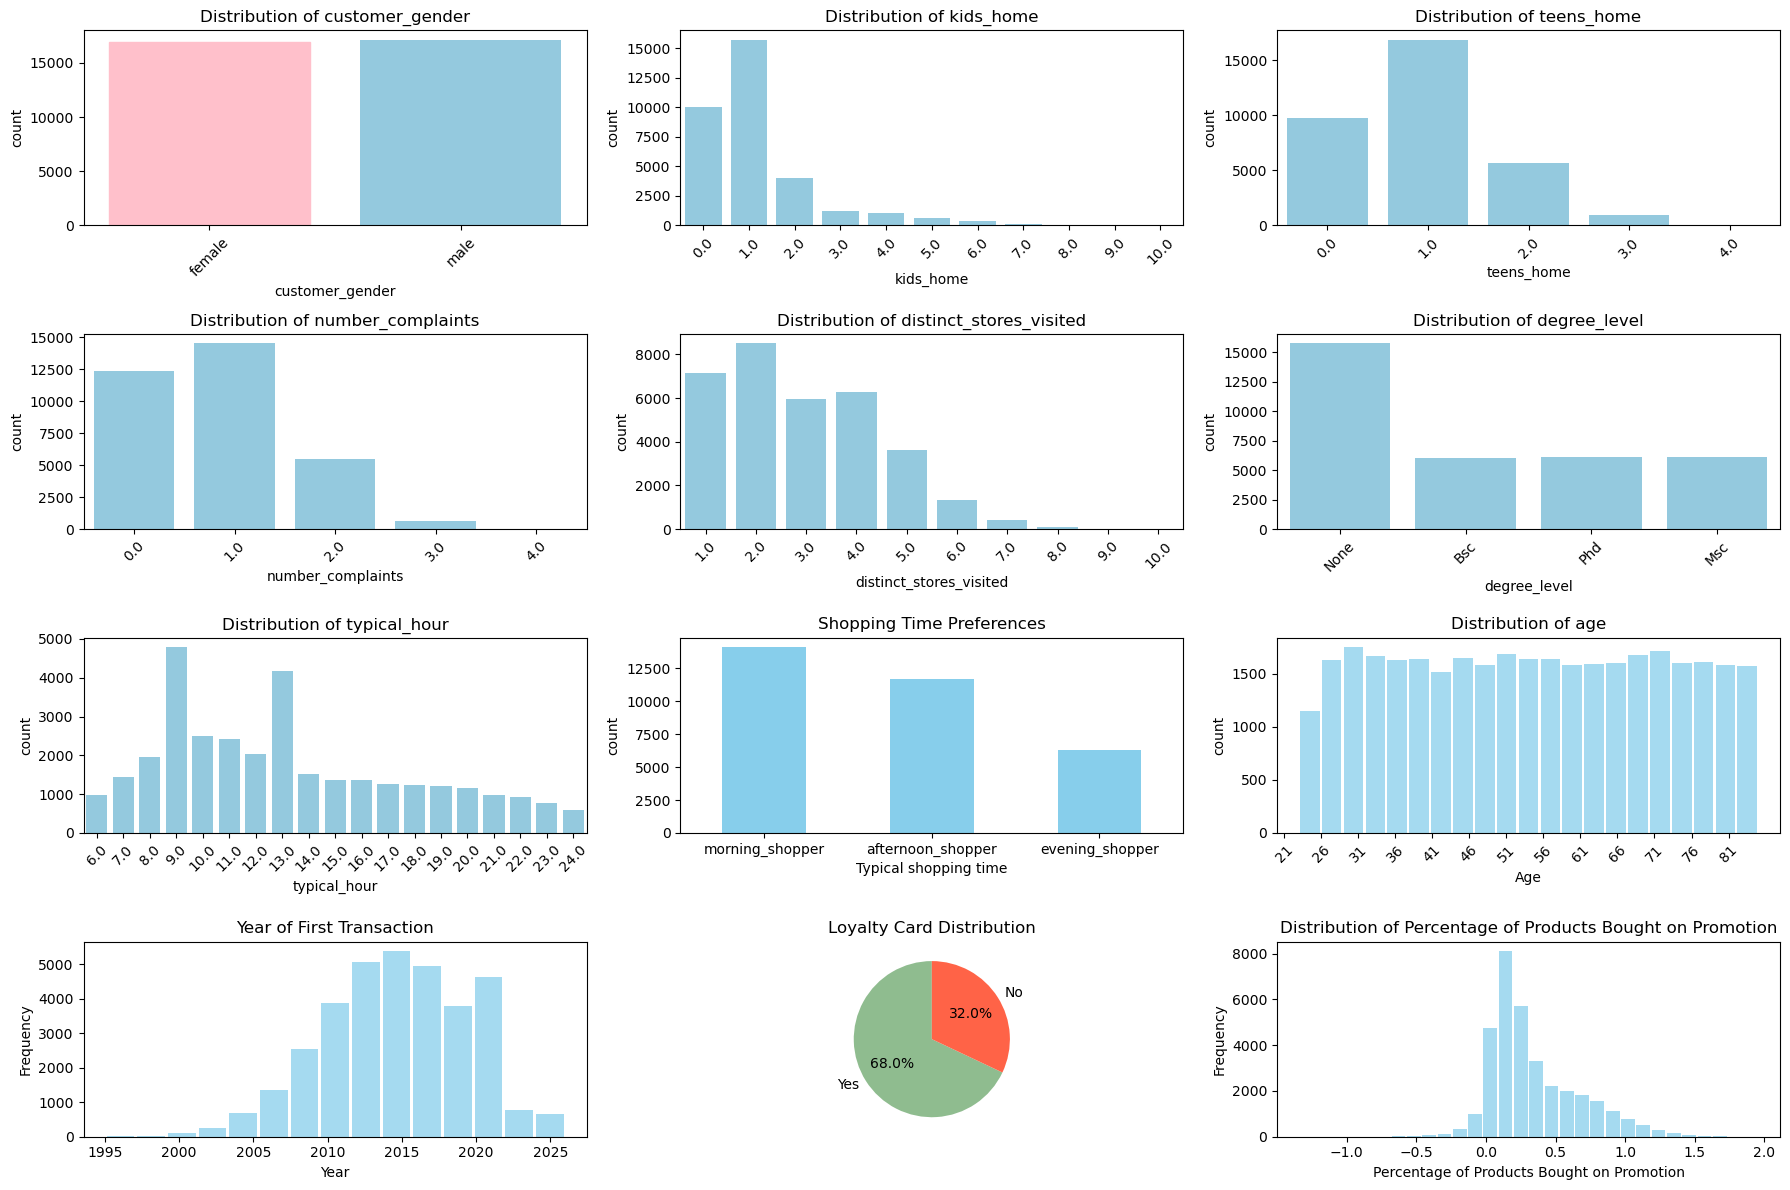

In [37]:
# Define the columns to plot
columns = ['customer_gender', 'kids_home', 'teens_home', 'number_complaints', 
           'distinct_stores_visited', 'degree_level', 'typical_hour'] 

# Create a grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 12))  # Adjust figure size
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot general bar plots for each column in the list
for i, col in enumerate(columns):
    sns.countplot(data=info_df, x=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Make female bar of ax 0 to be pink
bars = axes[0].patches  
bars[0].set_color('pink')


# Plot time preferences separately
time_columns = ['morning_shopper', 'afternoon_shopper', 'evening_shopper']
time_preferences = info_df[time_columns].sum()
time_preferences.plot(kind='bar', ax=axes[7], color='skyblue')
axes[7].set_title('Shopping Time Preferences')
axes[7].set_xlabel('Typical shopping time')
axes[7].set_ylabel('count')
axes[7].tick_params(axis='x', rotation=0)

# Plot ages with bins 
sns.histplot(data=info_df, x='age', ax=axes[8], binwidth=3, stat='count', linewidth=0, color='skyblue', element='bars', shrink=0.9)
axes[8].set_title(f'Distribution of age')
axes[8].set_xlabel('Age')
axes[8].set_ylabel('count')
axes[8].tick_params(axis='x', rotation=45)
axes[8].set_xticks(range(21, 86, 5))    # Add x ticks every 5 years

# Plot year of first transaction
sns.histplot(data=info_df, x='year_first_transaction', ax=axes[9], bins=15, kde=False, color='skyblue', linewidth=0, shrink=0.9)
axes[9].set_title('Year of First Transaction')
axes[9].set_xlabel('Year')
axes[9].set_ylabel('Frequency')
axes[9].tick_params(axis='x', rotation=0)

# Plot the pie chart of loyalty card distribution with a frame
loyalty_counts = info_df['loyalty_card'].map({1: 'Yes', 0: 'No'}).value_counts()
loyalty_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[10], colors=['darkseagreen', 'tomato'])
axes[10].set_title('Loyalty Card Distribution')
axes[10].set_ylabel('')

# We have space for one more subplot if we need it  
# fig.delaxes(axes[11])  # Remove the empty subplot

sns.histplot(data=info_df, x='percentage_of_products_bought_promotion', ax=axes[11], color='skyblue', bins=30, linewidth=0, shrink=0.9)
axes[11].set_title('Distribution of Percentage of Products Bought on Promotion')
axes[11].set_xlabel('Percentage of Products Bought on Promotion')
axes[11].set_ylabel('Frequency')


# Adjust layout
plt.tight_layout()
plt.show()

## Customer spending visualization

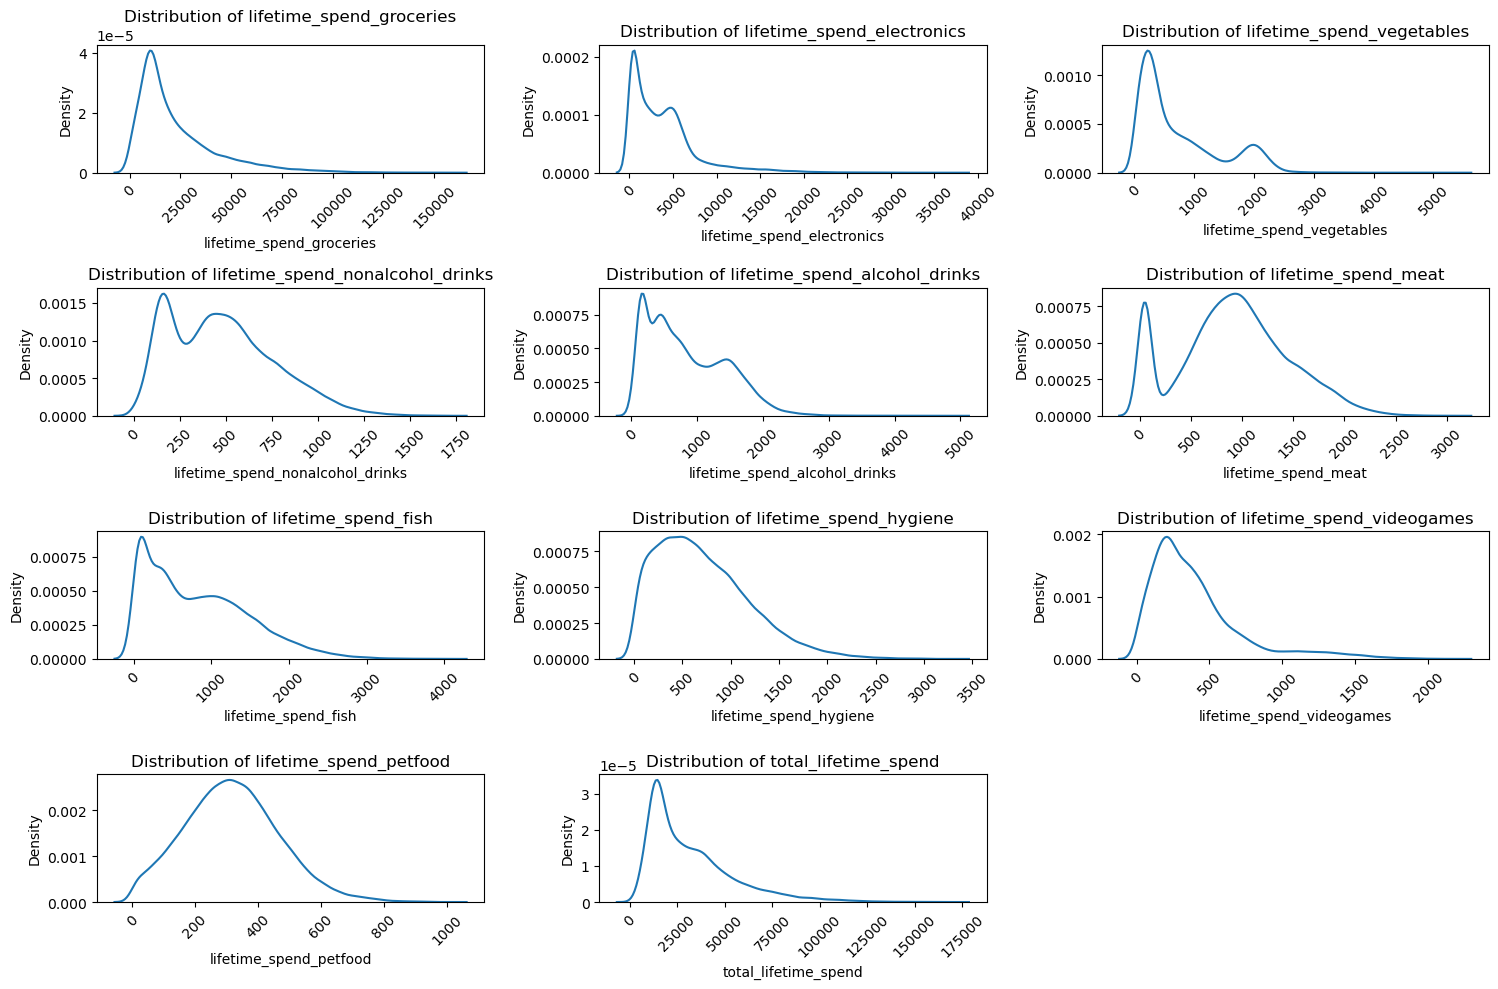

In [38]:
# Get columns with lifetime spend data
spend_columns = [col for col in info_df.columns if 'lifetime_spend' in col]  

# Create a grid of subplots
n_cols = 3  # Set the number of columns in the grid
n_rows = (len(spend_columns) + n_cols - 1) // n_cols  # Calculate the number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  
axes = axes.flatten() 

# Plot each column in a subplot
for i, col in enumerate(spend_columns):
    sns.kdeplot(data=info_df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(spend_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

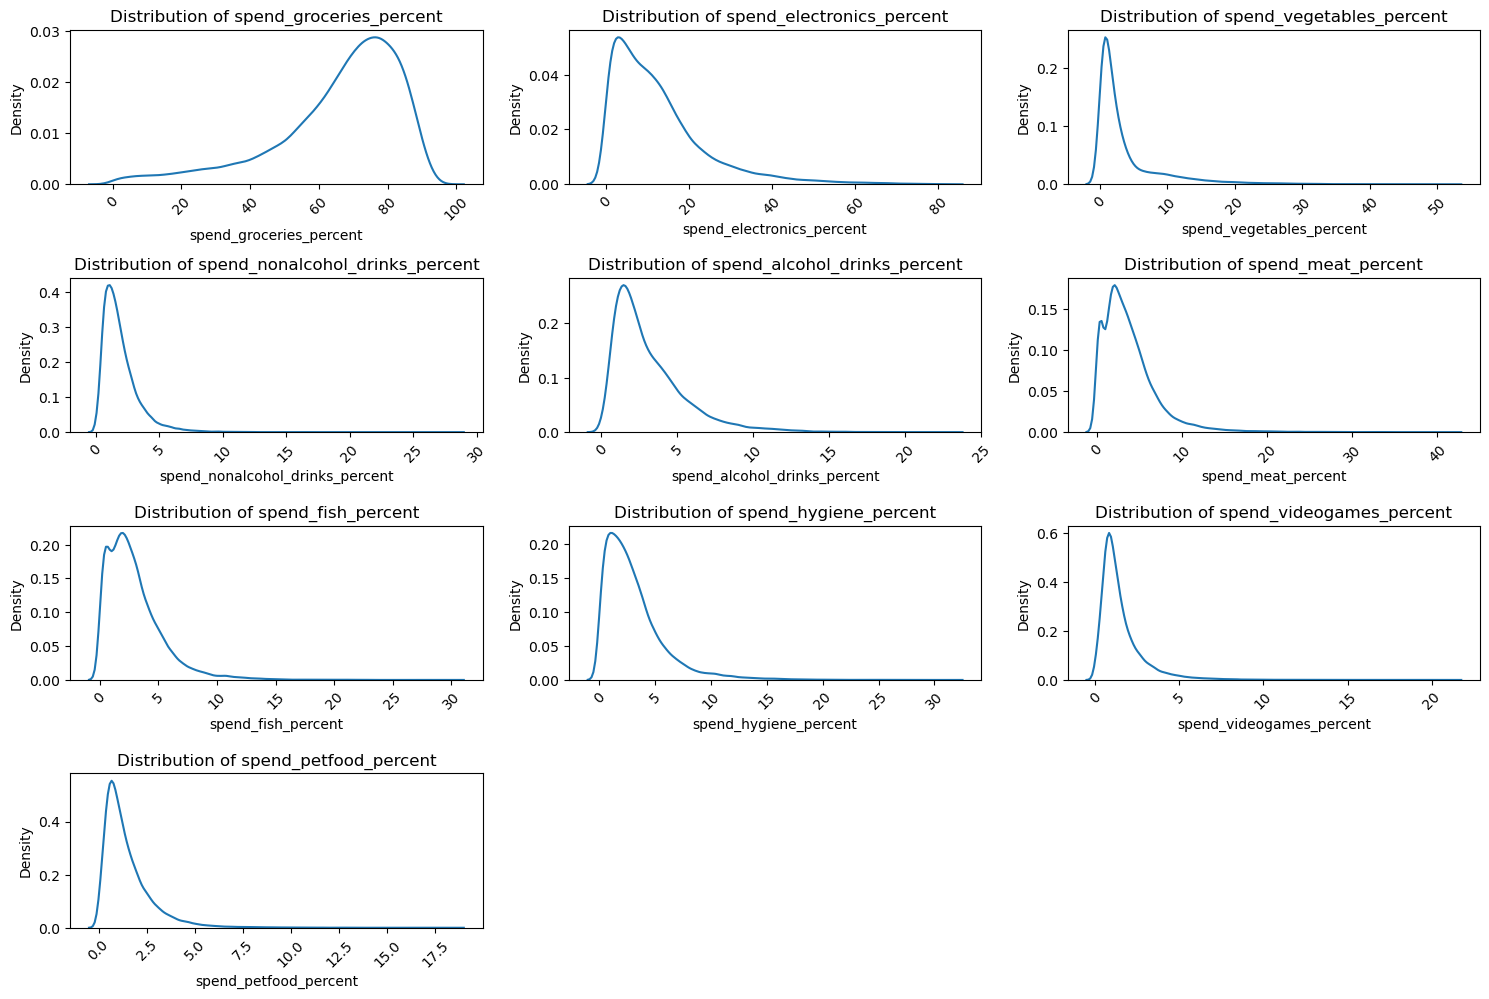

In [39]:
# Get columns with percent spend data for each category
spend_columns = [col for col in info_df.columns if '_percent' in col]

# Create a grid of subplots
n_cols = 3  # Set the number of columns in the grid
n_rows = (len(spend_columns) + n_cols - 1) // n_cols  # Calculate the number of rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  
axes = axes.flatten()  

# Plot each column in a subplot
for i, col in enumerate(spend_columns):
    sns.kdeplot(data=info_df, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(len(spend_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

## By City visualization

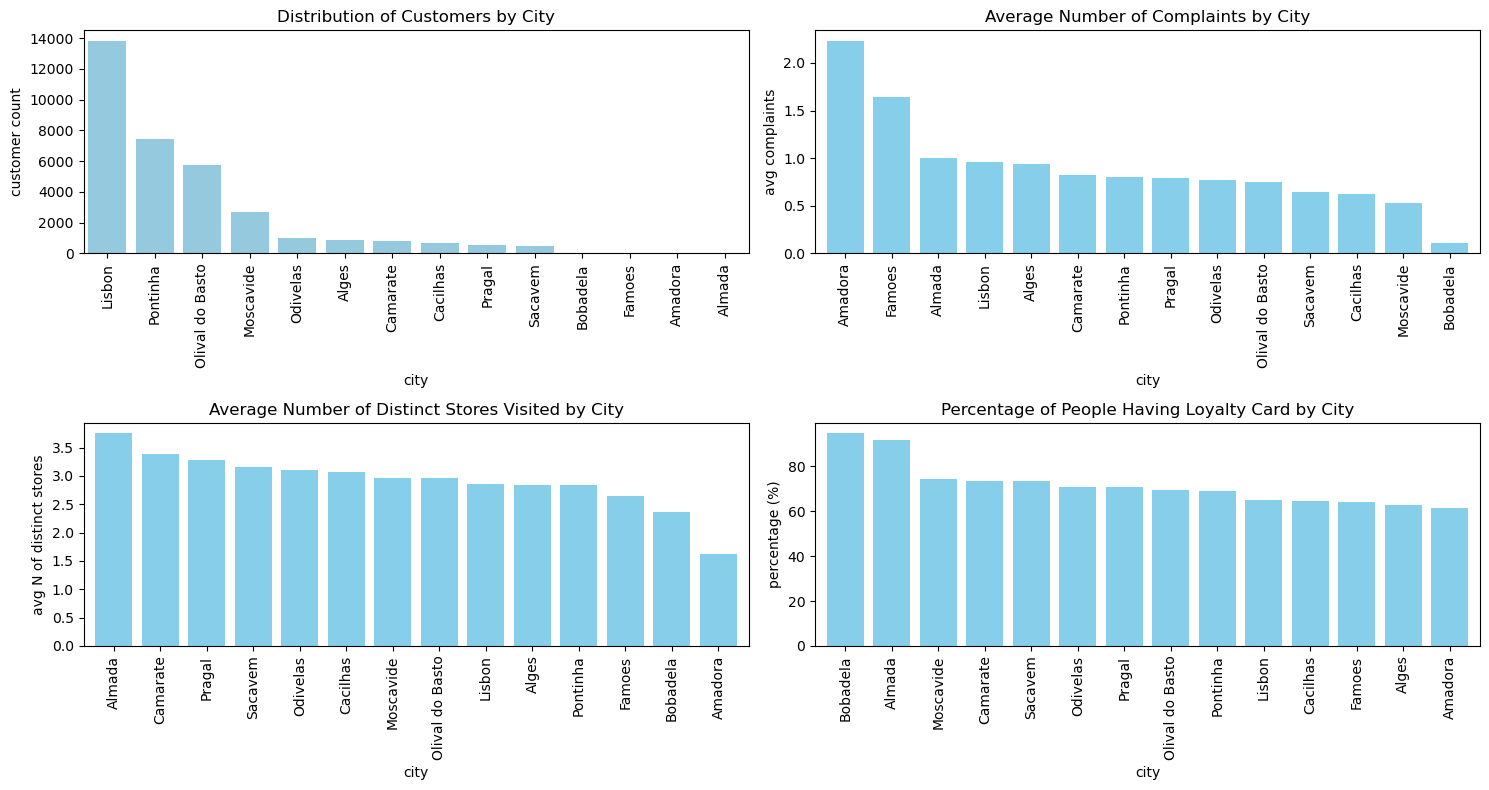

In [40]:
# Create a grid of subplots for the city analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 8))  
axes = axes.flatten()  

# Plot each subplot for the city analysis

# Distribution of Customers by City
sns.countplot(data=info_df, x='city', ax=axes[0], color='skyblue', order=info_df['city'].value_counts().index, width=0.8)
axes[0].set_title('Distribution of Customers by City')
axes[0].set_xlabel('city')
axes[0].set_ylabel('customer count')
axes[0].tick_params(axis='x', rotation=90)

# Average Number of Complaints by City
info_df.groupby('city')['number_complaints'].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='skyblue', width=0.8)
axes[1].set_title('Average Number of Complaints by City')
axes[1].set_xlabel('city')
axes[1].set_ylabel('avg complaints')
axes[1].tick_params(axis='x', rotation=90)

# 'Average Number of Distinct Stores Visited by City
distinct_stores_by_city = info_df.groupby('city')['distinct_stores_visited'].mean().sort_values(ascending=False)
distinct_stores_by_city.plot(kind='bar', ax=axes[2], color='skyblue', width=0.8)
axes[2].set_title('Average Number of Distinct Stores Visited by City')
axes[2].set_xlabel('city')
axes[2].set_ylabel('avg N of distinct stores')
axes[2].tick_params(axis='x', rotation=90)

# Percentage of People Having Loyalty Card by City
loyalty_percentage_by_city = info_df.groupby('city')['loyalty_card'].mean() * 100
loyalty_percentage_by_city.sort_values(ascending=False).plot(kind='bar', ax=axes[3], color='skyblue', width=0.8)
axes[3].set_title('Percentage of People Having Loyalty Card by City')
axes[3].set_xlabel('city')
axes[3].set_ylabel('percentage (%)')
axes[3].tick_params(axis='x', rotation=90)


# Adjust layout
plt.tight_layout()
plt.show()

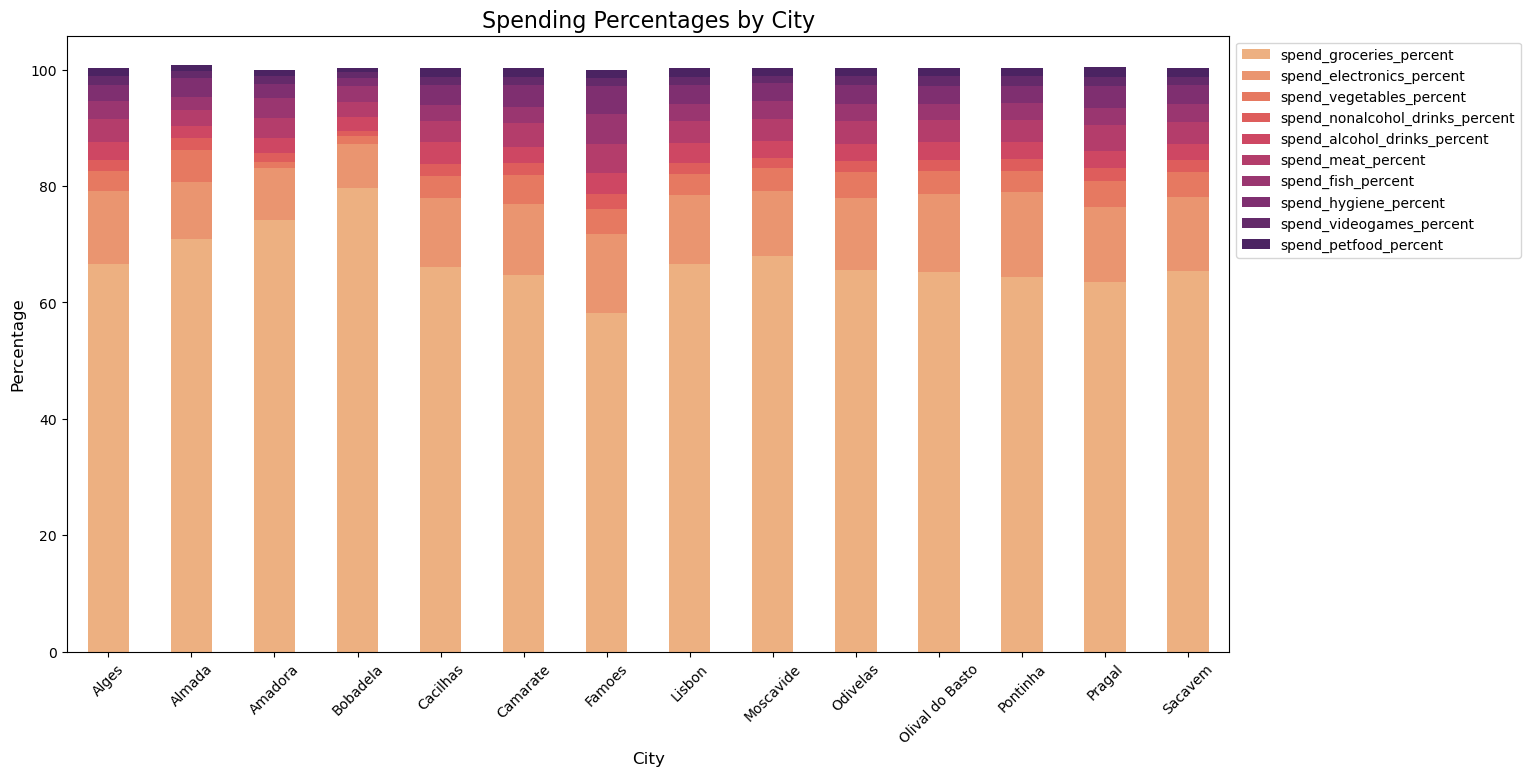

In [41]:
# Get columns with lifetime spend data
spending_percent_columns = [
    'spend_groceries_percent', 'spend_electronics_percent', 'spend_vegetables_percent',
    'spend_nonalcohol_drinks_percent', 'spend_alcohol_drinks_percent', 'spend_meat_percent',
    'spend_fish_percent', 'spend_hygiene_percent', 'spend_videogames_percent', 'spend_petfood_percent']

# Calculate the mean spending percentages by city
city_spending = info_df.groupby('city')[spending_percent_columns].mean()

# Plot the spending percentages by city
city_spending.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='flare')
plt.title('Spending Percentages by City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Correlations visualization

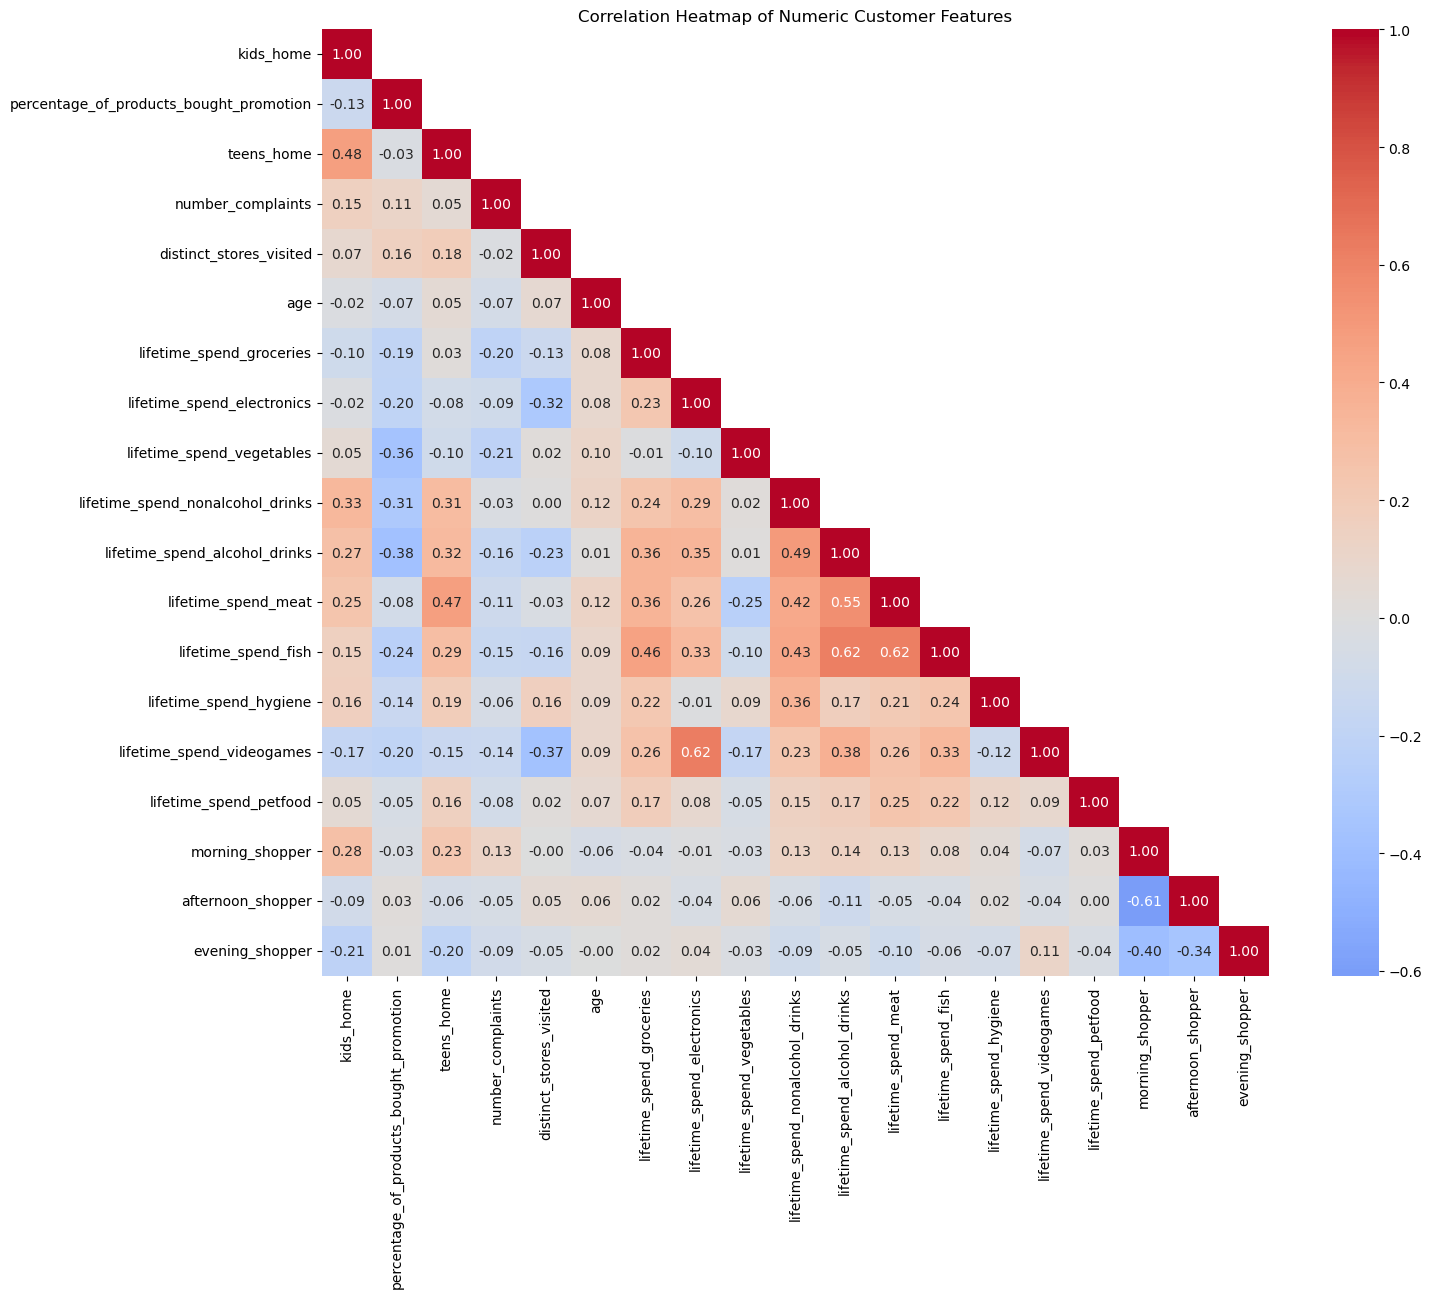

In [42]:
# Define the columns to plot
columns = ['kids_home', 'percentage_of_products_bought_promotion', 'teens_home', 'number_complaints', 
                   'distinct_stores_visited', 'age', 'lifetime_spend_groceries', 'lifetime_spend_electronics', 
                   'lifetime_spend_vegetables', 'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks', 
                   'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene', 'lifetime_spend_videogames', 
                   'lifetime_spend_petfood', 'morning_shopper', 'afternoon_shopper', 'evening_shopper']

# Calculate the correlation matrix for the selected columns
correlation_matrix = info_df[columns].corr()

# Create a mask to remove duplicate correlations but keep the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plot the heatmap
plt.figure(figsize=(16, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', mask=mask, square=True)
plt.title('Correlation Heatmap of Numeric Customer Features')
plt.tight_layout()
plt.show()

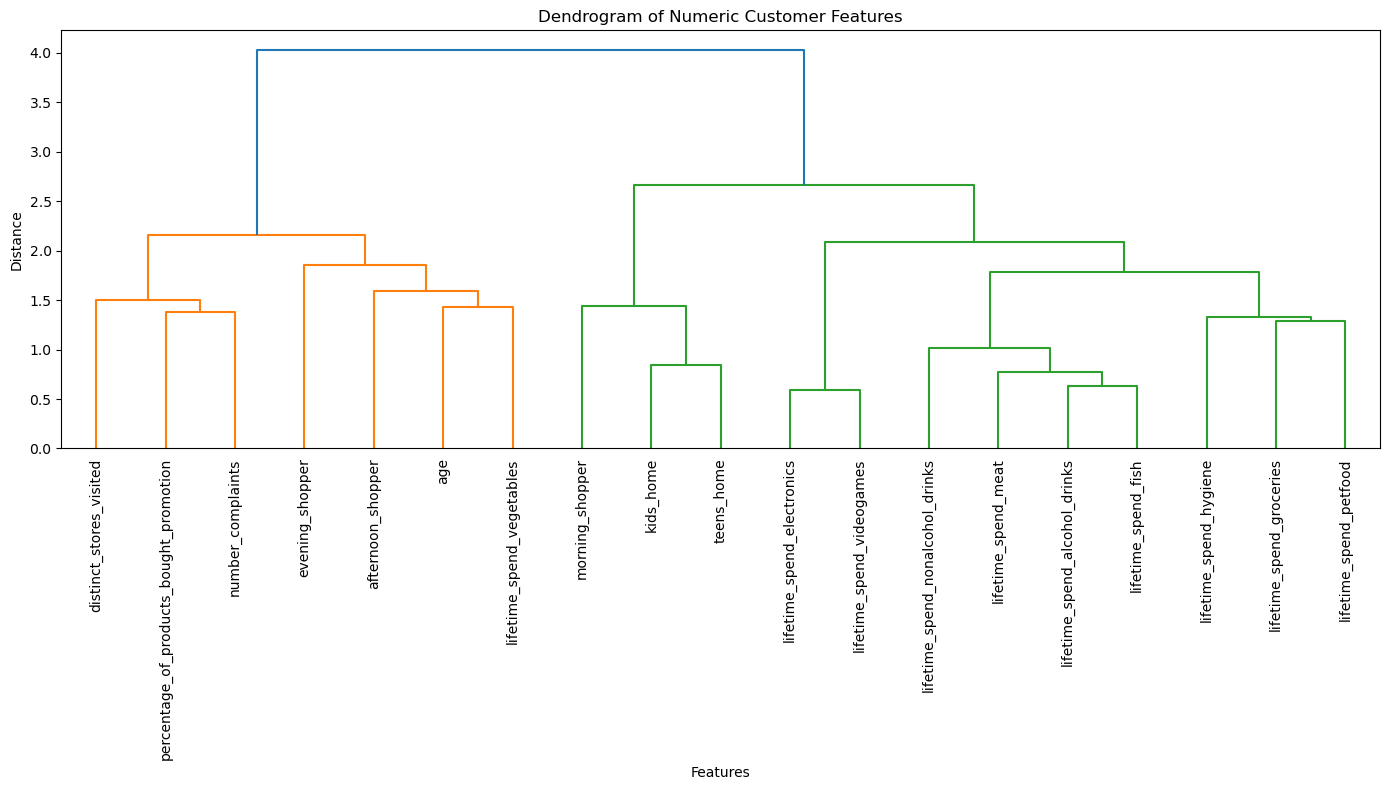

In [43]:
# Convert the correlation matrix to a distance matrix
distance_matrix = 1 - correlation_matrix

# Perform hierarchical clustering
linkage_matrix = sch.linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(14, 8))
dendrogram = sch.dendrogram(linkage_matrix, labels=columns, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram of Numeric Customer Features')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

## Basket visualization

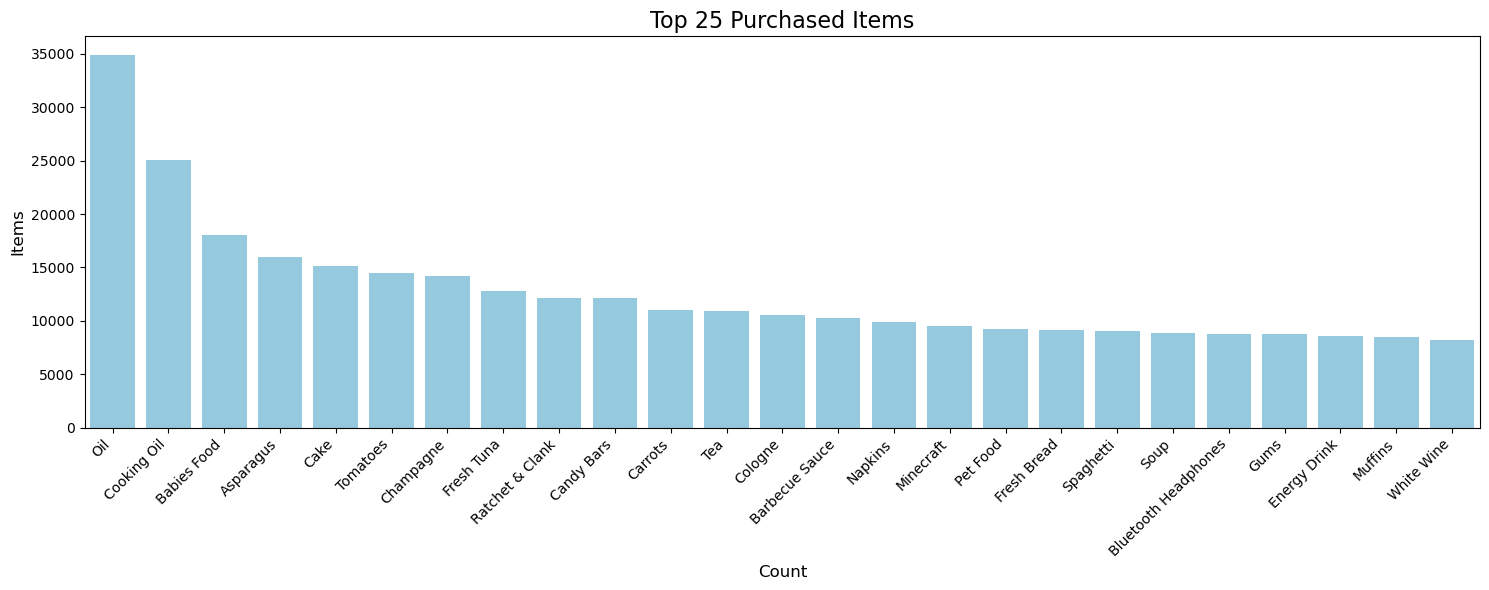

In [44]:
# Count the occurrences of each item
item_counts = Counter([item for sublist in all_items['all_purchased_items'] for item in sublist])

# Get the top most common items
top_items = item_counts.most_common(25)

# Separate the items and their counts for plotting
items, counts = zip(*top_items)
items = [item.replace('_', ' ').title() for item in items]  # Format item names
counts = list(counts)

# Plot the top items
plt.figure(figsize=(15, 6))
sns.barplot(x=items, y=counts, color='skyblue')
plt.title(f'Top {len(items)} Purchased Items', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Items', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Clustering

## Scaling and dimention reduction

In [132]:
# Get the numeric and categorical columns
info_df_scaled = info_df.copy()

# Get the numeric, discrete and categorical columns
info_col_continuous = [
                'lifetime_spend_groceries',
                'lifetime_spend_electronics',
                'lifetime_spend_vegetables',
                'lifetime_spend_nonalcohol_drinks',
                'lifetime_spend_alcohol_drinks',
                'lifetime_spend_meat',
                'lifetime_spend_fish',
                'lifetime_spend_hygiene',
                'lifetime_spend_videogames',
                'lifetime_spend_petfood',
                'lifetime_total_distinct_products',
                'percentage_of_products_bought_promotion',
                'total_lifetime_spend',
                'spend_groceries_percent',
                'spend_electronics_percent',
                'spend_vegetables_percent',
                'spend_nonalcohol_drinks_percent',
                'spend_alcohol_drinks_percent',
                'spend_meat_percent',
                'spend_fish_percent',
                'spend_hygiene_percent',
                'spend_videogames_percent',
                'spend_petfood_percent']

info_col_discrete  = [
                'kids_home',
                'teens_home',
                'number_complaints',
                'distinct_stores_visited',
                'total_children', 
                'age',
                'year_first_transaction']

info_col_categorical = [ 
                'customer_gender', 
                'city', 
                'degree_level']


# Not included 'customer_id', 'customer_name' and 'typical_hour'
# Also 'loyalty_card' cannot have missing values, so it is not included 
# We may have situations where 'morning_shopper', 'afternoon_shopper' and 'evening_shopper' are all 0 for a customer, but mb it's fine ??
# >>> We also have negative values in 'percentage_of_products_bought_promotion' <<< !!!


# Fill missing values for continuous columns with the mean and scale them
for col in info_col_continuous:
    info_df_scaled[col].fillna(info_df_scaled[col].mean(), inplace=True)

    scaler = RobustScaler()
    info_df_scaled[col] = scaler.fit_transform(info_df_scaled[[col]])


# Fill missing values for discrete columns with the median and scale them
for col in info_col_discrete:
    info_df_scaled[col].fillna(info_df_scaled[col].median(), inplace=True)

    scaler = RobustScaler()
    info_df_scaled[col] = scaler.fit_transform(info_df_scaled[[col]])


# Fill missing values for categorical columns with mode
for col in info_col_categorical:
    info_df_scaled[col].fillna(info_df_scaled[col].mode()[0], inplace=True)


# One-hot encode the categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_data = encoder.fit_transform(info_df_scaled[info_col_categorical])

# Create DataFrame with encoded column names
feature_names = encoder.get_feature_names_out(info_col_categorical)
encoded_df = pd.DataFrame(encoded_data, columns=feature_names, index=info_df_scaled.index)

# Remove original categorical columns and add encoded ones
info_df_scaled.drop(columns=info_col_categorical, inplace=True)
info_df_scaled = pd.concat([info_df_scaled, encoded_df], axis=1)

# Remove the 'customer_id', 'customer_name' and 'typical_hour' columns
info_df_scaled.drop(columns=['customer_id', 'customer_name', 'typical_hour'], inplace=True)

In [24]:
info_df_scaled.head()

,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,...,city_Lisbon,city_Moscavide,city_Odivelas,city_Olival do Basto,city_Pontinha,city_Pragal,city_Sacavem,degree_level_Msc,degree_level_None,degree_level_Phd
0,1.0,1.0,0.0,0.5,-0.383664,0.594066,0.299189,1.183721,0.526316,1.004418,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.0,0.0,-1.0,0.5,-0.342682,-0.657002,0.378492,-0.816279,-0.664876,-0.257732,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,-1.0,2.0,-0.012926,0.296022,1.331331,1.225581,1.234157,0.599411,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-1.0,-1.0,0.0,-1.0,-0.115619,3.013711,-0.539501,-0.427907,1.215897,0.033873,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,1.582967,0.053720,-0.263142,0.634884,-0.189044,0.098675,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [72]:
info_df_scaled.columns

Index(['kids_home', 'teens_home', 'number_complaints',
       'distinct_stores_visited', 'lifetime_spend_groceries',
       'lifetime_spend_electronics', 'lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_spend_petfood',
       'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction',
       'age', 'morning_shopper', 'afternoon_shopper', 'evening_shopper',
       'total_lifetime_spend', 'spend_groceries_percent',
       'spend_electronics_percent', 'spend_vegetables_percent',
       'spend_nonalcohol_drinks_percent', 'spend_alcohol_drinks_percent',
       'spend_meat_percent', 'spend_fish_percent', 'spend_hygiene_percent',
       'spend_videogames_percent', 'spend_petfood_percent', 'loyalty_card',
       'total_children', 'customer_gender_male', 'city_Almad

In [73]:
info_df_scaled.shape

(34060, 51)

In [133]:
# Try reducing the dimensionality of the data

# info_df_scaled.drop(columns=['spend_groceries_percent',
#        'spend_electronics_percent', 'spend_vegetables_percent',
#        'spend_nonalcohol_drinks_percent', 'spend_alcohol_drinks_percent',
#        'spend_meat_percent', 'spend_fish_percent', 'spend_hygiene_percent',
#        'spend_videogames_percent', 'spend_petfood_percent'], inplace=True)

# Redundant columns
info_df_scaled.drop(columns=['lifetime_spend_groceries',
       'lifetime_spend_electronics', 'lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_spend_petfood'], inplace=True)

info_df_scaled.drop(columns=['kids_home', 'teens_home'], inplace=True)


# Irrelevant columns
info_df_scaled.drop(columns=['city_Almada', 'city_Amadora', 'city_Bobadela',
       'city_Cacilhas', 'city_Camarate', 'city_Famoes', 'city_Lisbon',
       'city_Moscavide', 'city_Odivelas', 'city_Olival do Basto',
       'city_Pontinha', 'city_Pragal', 'city_Sacavem'], inplace=True)

info_df_scaled.drop(columns=['spend_petfood_percent', 'degree_level_Msc', 'degree_level_Phd', 'customer_gender_male'], inplace=True)


In [134]:
info_df_scaled.shape

(34060, 22)

In [135]:
info_df_scaled.columns

Index(['number_complaints', 'distinct_stores_visited',
       'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'year_first_transaction',
       'age', 'morning_shopper', 'afternoon_shopper', 'evening_shopper',
       'total_lifetime_spend', 'spend_groceries_percent',
       'spend_electronics_percent', 'spend_vegetables_percent',
       'spend_nonalcohol_drinks_percent', 'spend_alcohol_drinks_percent',
       'spend_meat_percent', 'spend_fish_percent', 'spend_hygiene_percent',
       'spend_videogames_percent', 'loyalty_card', 'total_children',
       'degree_level_None'],
      dtype='object')

## K-mean

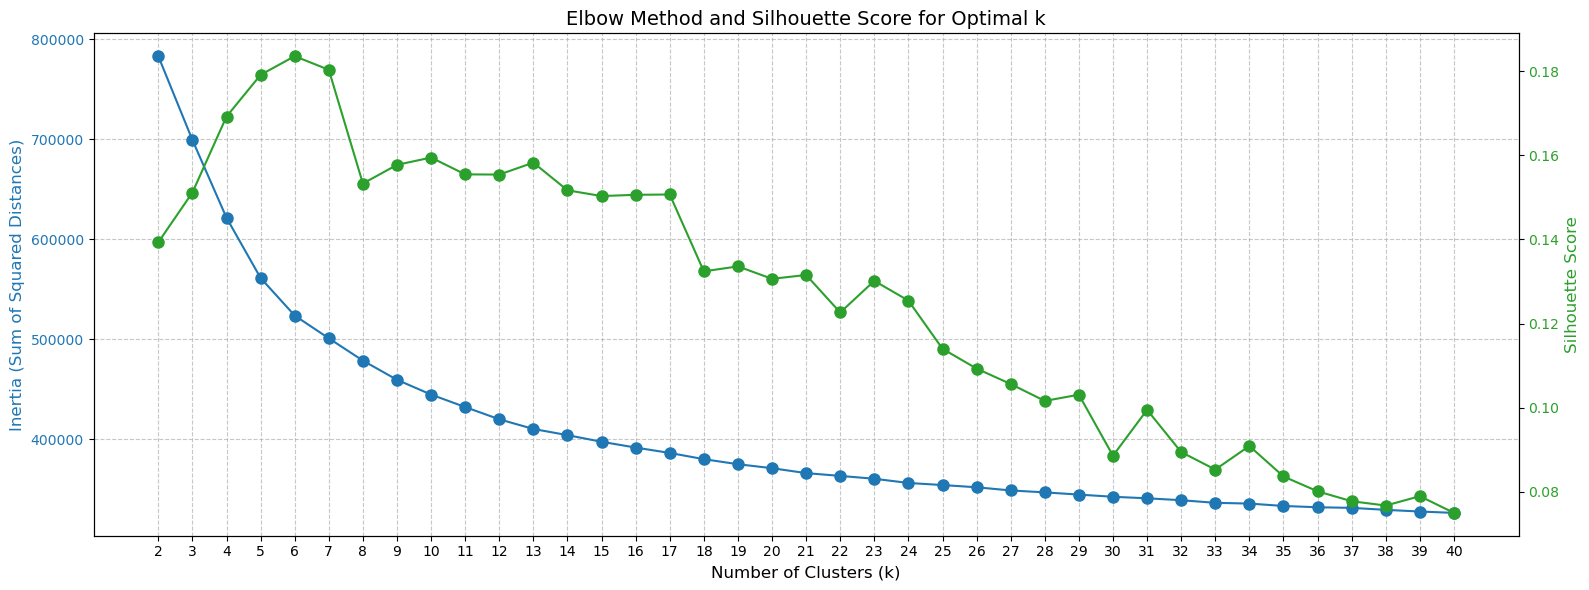

In [25]:
# Setup for tracking both metrics
k_range = range(2, 41)  # Silhouette score requires at least 2 clusters
inertia_values = []
silhouette_scores = []

# Calculate both metrics for each k value
for k in k_range:
    # Create and fit KMeans model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(info_df_scaled)
    
    # Store inertia (sum of squared distances to nearest centroid)
    inertia_values.append(kmeans.inertia_)
    
    # Calculate and store silhouette score
    silhouette_avg = silhouette_score(info_df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(16, 6))

# Plot 1: Elbow Method on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Inertia (Sum of Squared Distances)', color=color, fontsize=12)
ax1.plot(k_range, inertia_values, 'o-', color=color, markersize=8, label='Inertia')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Silhouette Score', color=color, fontsize=12)
ax2.plot(k_range, silhouette_scores, 'o-', color=color, markersize=8, label='Silhouette Score')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title
plt.title('Elbow Method and Silhouette Score for Optimal k', fontsize=14)
plt.xticks(k_range)  # Set x-ticks to match k_range

# Adjust layout
plt.tight_layout()
plt.show()

In [136]:
# Fit KMeans with your chosen number of clusters 
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(info_df_scaled)

# Add the cluster labels to your DataFrame
info_df_clustered = info_df_scaled.copy()
info_df_clustered['cluster'] = clusters


cluster_profiles = info_df_clustered.groupby('cluster').mean().round(2)
cluster_profiles

,number_complaints,distinct_stores_visited,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,age,morning_shopper,afternoon_shopper,evening_shopper,total_lifetime_spend,...,spend_vegetables_percent,spend_nonalcohol_drinks_percent,spend_alcohol_drinks_percent,spend_meat_percent,spend_fish_percent,spend_hygiene_percent,spend_videogames_percent,loyalty_card,total_children,degree_level_None
cluster,,,,,,,,,,,,,,,,,,,,,
0,-0.29,0.08,-0.25,-0.31,-0.05,0.08,0.30,0.43,0.21,-0.40,...,4.37,1.01,0.22,-0.70,-0.69,1.08,0.38,0.61,-0.33,0.36
1,-0.12,0.16,0.39,0.34,-0.19,0.10,0.43,0.36,0.16,-0.47,...,1.01,2.02,1.57,2.34,2.22,1.82,2.07,0.76,0.25,0.47
2,-0.41,-0.17,0.38,-0.00,-0.17,0.08,0.33,0.39,0.21,1.19,...,-0.05,-0.35,-0.24,-0.35,-0.20,-0.25,-0.23,0.72,-0.24,0.33
3,-0.21,-0.73,-0.02,0.15,0.37,-0.06,0.26,0.27,0.39,0.15,...,-0.22,0.11,0.63,0.01,0.26,-0.35,2.03,0.45,-0.71,0.38
4,-0.11,0.10,0.94,-0.07,-0.33,0.09,0.67,0.25,0.04,0.21,...,0.20,0.64,0.75,0.47,0.63,0.26,0.12,0.72,1.23,0.40
5,0.14,0.18,-0.30,1.00,0.12,-0.15,0.42,0.36,0.17,-0.33,...,0.29,-0.14,-0.07,0.60,0.03,0.25,0.02,0.72,-0.06,0.74


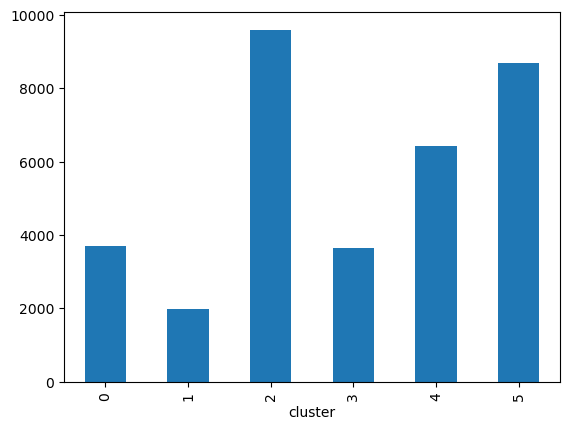

In [137]:
info_df_clustered.groupby(['cluster']).size().plot(kind='bar')
plt.show()

In [112]:
def generate_cluster_names(cluster_profiles, top_n=3):
    labels = {}
    
    for i, row in cluster_profiles.iterrows():
        top_features = row.sort_values(ascending=False).head(top_n).index.tolist()
        low_features = row.sort_values(ascending=True).head(top_n).index.tolist()

        high_label = "HIGH : " + ", ".join(f.replace('_', ' ') for f in top_features)
        low_label = "LOW :  " + ", ".join(f.replace('_', ' ') for f in low_features)
        
        labels[i] = f"{high_label} | {low_label}"
    
    return labels

In [ ]:
def generate_cluster_names2(cluster_profiles, z_threshold, max_features=4):
    """
    Generate cluster names based on statistically significant features.
    
    Args:
        cluster_profiles: DataFrame with clusters as rows and features as columns
        z_threshold: Z-score threshold to consider a feature significant (default: 1.5)
        max_features: Maximum number of features to include for each direction (default: 5)
    
    Returns:
        Dictionary mapping cluster IDs to descriptive labels
    """
    labels = {}
    
    # Calculate global mean and std for normalization reference
    global_mean = cluster_profiles.mean().mean()
    global_std = cluster_profiles.values.std()
    
    for i, row in cluster_profiles.iterrows():
        # Calculate z-scores for each feature
        z_scores = (row - global_mean) / global_std
        
        # Get significant high features (z-score > threshold)
        high_features = z_scores[z_scores > z_threshold].sort_values(ascending=False)
        high_features = high_features.head(max_features).index.tolist()
        
        # Get significant low features (z-score < -threshold)
        low_features = z_scores[z_scores < -z_threshold].sort_values(ascending=True)
        low_features = low_features.head(max_features).index.tolist()
        
        # Create labels
        high_label = "HIGH : " + ", ".join(f.replace('_', ' ') for f in high_features) if high_features else "No significant high features"
        low_label = "LOW : " + ", ".join(f.replace('_', ' ') for f in low_features) if low_features else "No significant low features"
        
        labels[i] = f"{high_label} | {low_label}"
    
    return labels

In [138]:
# Generate cluster names
cluster_names = generate_cluster_names2(cluster_profiles, z_threshold=0.5)

# Print cluster descriptions
for k, v in cluster_names.items():
    print(f"Cluster {k}: {v}")

Cluster 0: HIGH : spend vegetables percent, spend hygiene percent, spend nonalcohol drinks percent | LOW : spend groceries percent, spend meat percent, spend fish percent, total lifetime spend
Cluster 1: HIGH : spend meat percent, spend fish percent, spend videogames percent, spend nonalcohol drinks percent | LOW : spend groceries percent, total lifetime spend, year first transaction, number complaints
Cluster 2: HIGH : total lifetime spend, loyalty card | LOW : number complaints, spend nonalcohol drinks percent, spend meat percent, spend hygiene percent
Cluster 3: HIGH : spend videogames percent, spend electronics percent | LOW : spend groceries percent, distinct stores visited, total children, spend hygiene percent
Cluster 4: HIGH : total children, lifetime total distinct products, spend alcohol drinks percent, loyalty card | LOW : spend groceries percent, year first transaction, number complaints
Cluster 5: HIGH : percentage of products bought promotion, degree level None, loyalty c

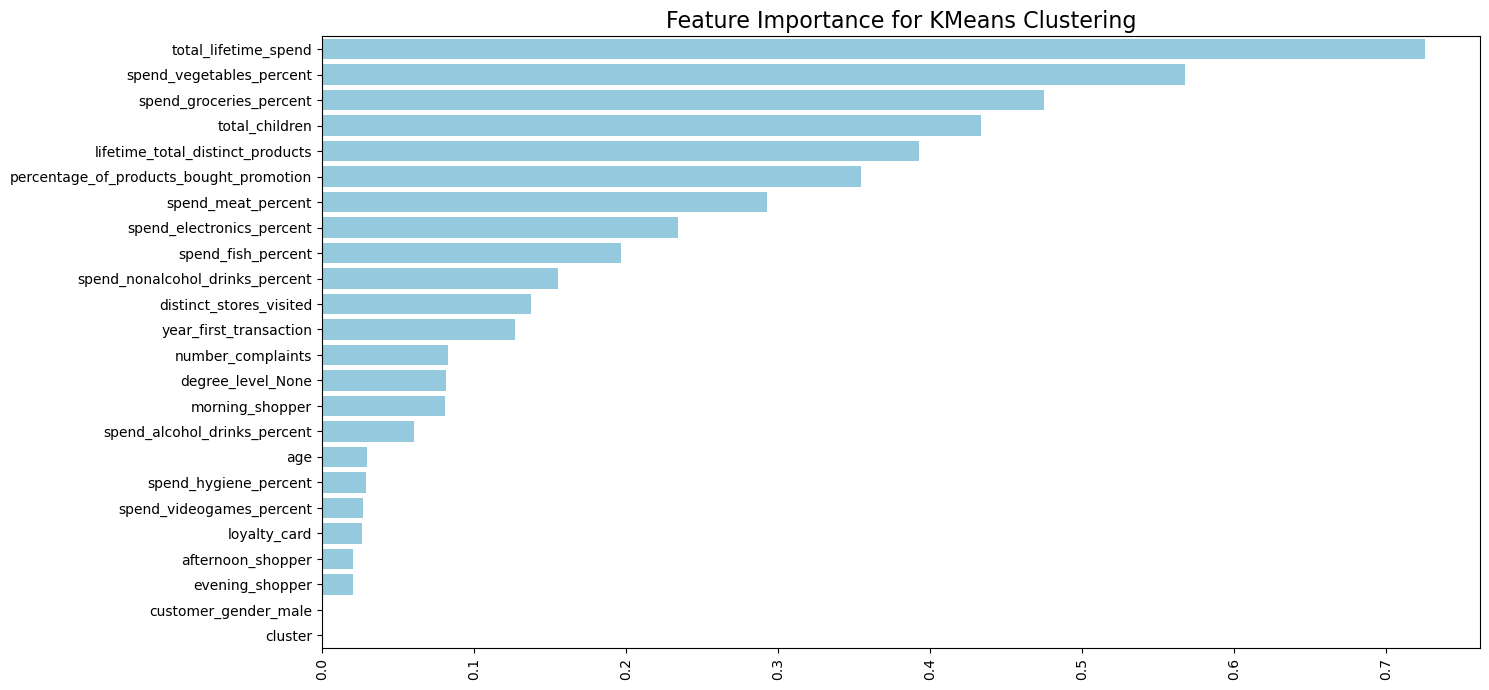

In [130]:
# Calculate the variance of each feature within clusters
cluster_variances = info_df_clustered.groupby('cluster').var()

# Calculate the overall variance of each feature
overall_variances = info_df_clustered.var()

# Compute the ratio of within-cluster variance to overall variance for each feature
feature_importance = 1 - (cluster_variances.mean() / overall_variances)

# Sort features by importance
feature_importance = feature_importance.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(15, 7))
sns.barplot(y=feature_importance.index, x=feature_importance.values, color='skyblue')
plt.title('Feature Importance for KMeans Clustering', fontsize=16)
plt.ylabel('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [105]:
feature_importance.index

Index(['total_lifetime_spend', 'spend_vegetables_percent',
       'spend_groceries_percent', 'total_children',
       'lifetime_total_distinct_products',
       'percentage_of_products_bought_promotion', 'spend_meat_percent',
       'spend_electronics_percent', 'spend_fish_percent',
       'spend_nonalcohol_drinks_percent', 'distinct_stores_visited',
       'year_first_transaction', 'degree_level_None', 'number_complaints',
       'morning_shopper', 'spend_alcohol_drinks_percent', 'age',
       'spend_hygiene_percent', 'loyalty_card', 'spend_videogames_percent',
       'evening_shopper', 'afternoon_shopper', 'customer_gender_male',
       'degree_level_Msc', 'degree_level_Phd', 'cluster'],
      dtype='object')

## SOM

In [52]:
info_df_scaled.shape

(34060, 51)

In [51]:
from minisom import MiniSom

In [53]:
# som = MiniSom(
#     15,
#     15,
#     6,
#     sigma=0.5,
#     learning_rate=1,
#     neighborhood_function='gaussian',
#     random_seed=42
#     )

# Initialize SOM
som = MiniSom(x=15, y=15, 
              input_len=info_df_scaled.shape[1],  # Number of features
            #   sigma=5,  # Initial neighborhood radius
              learning_rate=0.5,  # Initial learning rate
              neighborhood_function='gaussian',
              random_seed=42)

Iteration 0, Quantization error: 4.733000005679742
Iteration 100, Quantization error: 4.708727285949387
Iteration 200, Quantization error: 4.714027076344164
Iteration 300, Quantization error: 4.723497904540405
Iteration 400, Quantization error: 4.728386981149793
Iteration 500, Quantization error: 4.729403884198858
Iteration 600, Quantization error: 4.728674504740039
Iteration 700, Quantization error: 4.727645508521203
Iteration 800, Quantization error: 4.72686708679824
Iteration 900, Quantization error: 4.726442402401175


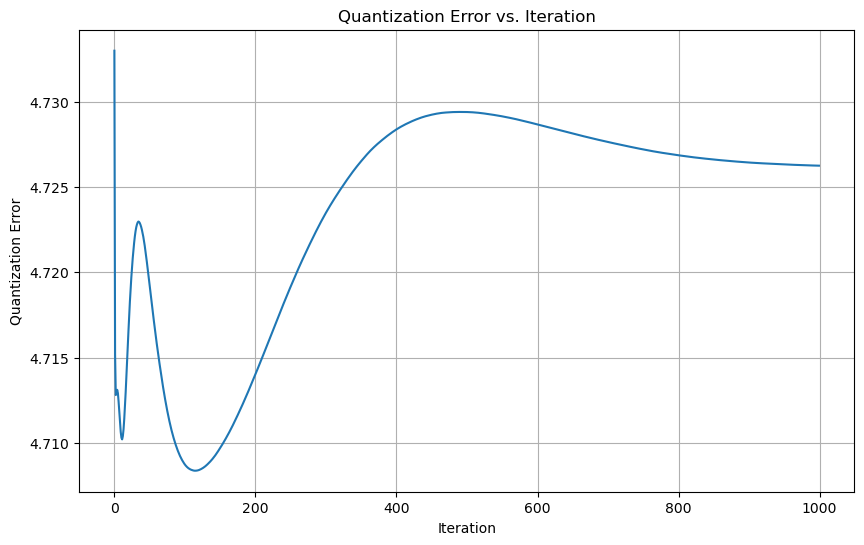

In [57]:
# Convert DataFrame to NumPy array before passing to SOM
info_df_scaled_array = np.array(info_df_scaled)

# Set the seed for reproducibility
np.random.seed(42)

num_iterations = 1000
q_errors = []

# Train the SOM with single update and track error
for i in range(num_iterations):

    # Usually you would calculate these based on the iteration number
    current_lr = 0.5 * (1 - i/num_iterations)  # Linear decay from 0.5 to 0
    
    # Train for a single iteration (all samples once)
    som.train_batch(info_df_scaled_array, num_iteration=1)
    
    # Calculate and store quantization error
    q_errors.append(som.quantization_error(info_df_scaled_array))
    
    if i % 100 == 0:
        print(f"Iteration {i}, Quantization error: {q_errors[-1]}")

# Plot the quantization error over iterations
plt.figure(figsize=(10, 6))
plt.plot(q_errors)
plt.title('Quantization Error vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Quantization Error')
plt.grid(True)
plt.show()

## temp

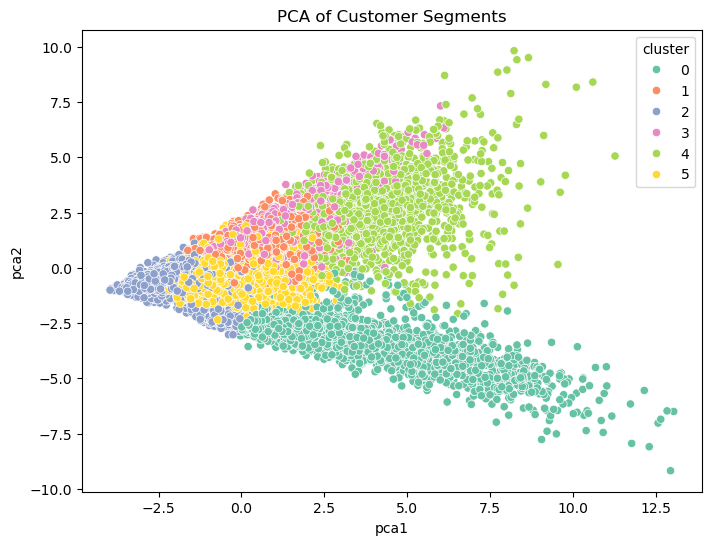

In [131]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(info_df_clustered.drop('cluster', axis=1))
info_df_clustered['pca1'] = pca_result[:, 0]
info_df_clustered['pca2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=info_df_clustered, x='pca1', y='pca2', hue='cluster', palette='Set2')
plt.title('PCA of Customer Segments')
plt.show()